<a href="https://colab.research.google.com/github/mabittar/Portfolio/blob/master/Visualiza%C3%A7%C3%B5es_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualização de Dados

Já dizia o velho ditado: 

*Uma imagem vale mais do que mil palavras.*

Somente essa frase já demonstra a importância da visualização dos dados, podemos definir a visualização como um importante conjunto de ferramentas para um cientista de dados. Uma boa visualização favorece a comunicação e pode facilitar a identificação dos dados, sendo uma boa prática para compreender melhor o conjunto de dados. O campo visual facilita a ligação com o nosso cérebro, pois nos remete a padrões ou tendências dos dados visuais, em comparação com a leitura ou outros meios.

Neste artigo, vou cobrir o conceito de visualização a partir do básico usando Python.

Embora não cobriremos todas as visualizações que possam ser construídas, será possívell observar e aprender os conceitos utilizados na construção de um gráfico.

Os scripts e os dados utilizados neste artigo também serão compartilhados no meu portfolio de projetos no GitHub, passe por lá para conferir os demais projetos. 

In [ ]:
# importar pacotes
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib

Using matplotlib backend: agg


## Visualizações com o Matplot

Começaremos com alguma visualização básica. 

É melhor usar o código `fig,ax=plt.subplots()`, onde `plt.subplots()` é uma função que devolverá uma tupla com uma figura e eixos com objetos atribuídos às variáveis `fig` e `ax` respectivamente. Sem usar isto também, é possível imprimir um gráfico, mas ao usar desta forma, seria possível fazer alterações à figura como se fosse possível redimensionar os gráficos dependendo do seu aspecto e salvar o gráfico também. Da mesma forma, a variável "eixo" aqui pode ser usada para fornecer etiquetas aos eixos. 

Abaixo está um exemplo simples onde gerei os dados aleatóriamente como uma matriz e os imprimi directamente como um gráfico

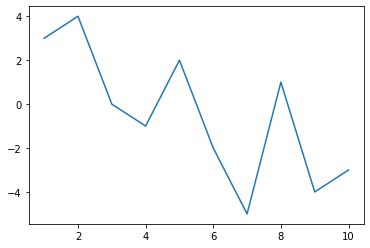

In [ ]:
# criando o gráfico com o Matplot
fig, ax = plt.subplots()

# repare que o argumento do ax.plot gera dados aleatórios
ax.plot(np.arange(10)+1, random.sample(range(-5, 5), 10) )

# para usar a biblioteca numpy para gerar números aleatórios utilize 'np.random.randint(-5, 5 + 1, 100, dtype=int)'

plt.savefig(fname="vis-1-oneline.jpg")

Observe que eu fiz questão de deixar a geração números randômicos utilizando o Numpy e a biblioteca Random do Python, para servir de demonstração.


Como aprendizado irei demonstrar no próximo passo como é simples acrescentar mais um plot de linha ao gráfico.



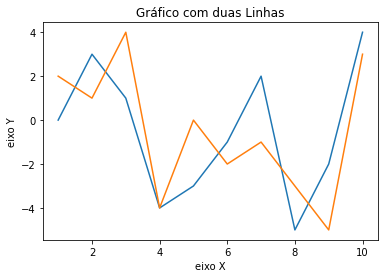

In [ ]:
# criando o gráfico com o Matplot
fig, ax = plt.subplots()

# repare que o argumento do ax.plot gera dados aleatórios
ax.plot(np.arange(10)+1, random.sample(range(-5, 5), 10), label= 'dados1' )
ax.plot(np.arange(10)+1, random.sample(range(-5, 5), 10), label= 'dados2' )

ax.set_xlabel('eixo X')
ax.set_ylabel('eixo Y')
ax.set_title('Gráfico com duas Linhas');
# repare que o sinal ";" ao final retira a mensagem de alerta no topo do gráfico
plt.savefig(fname="vis-2-twolines.jpg")

### Outros Gráficos

Agora, vamos começar a utilizar alguns dados reais (importando de um dataset) e aprender sobre a construção de gráficos, sobre a personalização, e torná-los mais intuitivos. 

Vale a ressalva que na maioria dos casos de utilização de dados reais, esses exigem alguma transformação para os tornar utilizáveis para os gráficos. 

Abaixo está um exemplo em que utilizei os dados da Netflix mas transformei os dados para consolidar o número de filmes e séries por ano. Ainda acrescentei alguns detalhes adicionais para tornar o gráfico mais intuitivo e auto-explicativo.

#### O Dataset

Nesta etapa iremos utilizar os dados de um dataset disponível no Kaggle sobre séries e filmes listados no Netflix em 2019. Segundo o autor do dataset os dados foram coletados utilizando a API Flixable.

Para mais informações sobre os dados você pode consultar diretamente no site do [Kaggle](https://www.kaggle.com/shivamb/netflix-shows).


No próximo bloco iremos importar os dados do dataset diretamente para o Colab.

Confira no [post](https://medium.com/@marcelmartinsbittar/como-importar-um-dataset-do-kaggle-para-o-google-colab-a79c47005e6d) que eu fiz mais detalhes e o passo a passo para viabilizar esse `import`.


In [ ]:
# !pip install kaggle; #caso seja necessário atualizar a biblioteca no google colab

from google.colab import files
files.upload() #enviar o arquivo kaggle.json

# antes de importar o dataset nós iremos provisionar o local de armazenamento
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Alterar a permissão para evitar o aviso durante a partida da ferramenta Kaggle
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

# Aceitar a competição e copiar o endereço da API para o download do dataset
!kaggle datasets download -d shivamb/netflix-shows

# Descompactar o arquivo baixado
!unzip \*.zip  && rm *.zip

Saving kaggle.json to kaggle.json
  0% 0.00/1.18M [00:00<?, ?B/s]
100% 1.18M/1.18M [00:00<00:00, 78.6MB/s]
Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      


In [ ]:
# Convertendo o csv para um DataFrame
df = pd.read_csv('/content/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Gráficos de Tendências

A introdução a seguir sobre gráfico de tendências eu retirei do site [FM2S](https://www.fm2s.com.br/grafico-de-tendencia/), pois está bem detalhado o objetivo e porque utilizá-lo.

*O Gráfico de Tendência é um gráfico de linhas que mostra como um determinado indicador se comporta ao longo do tempo. Assim, com ele pode-se identificar padrões no comportamento do indicador, como sazonalidade, tendência de aumento, queda ou ciclos.*

*Esse gráfico é simplesmente um registro de uma medida ou característica ao longo do tempo. Além disso, deve sempre fazer parte do estudo da variação em um processo ou sistema, concentrando-se na complexidade dinâmica (complexidade ao longo do tempo) assim como na complexidade de detalhe de medidas específicas.*

*A própria simplicidade do gráfico é o que o torna tão poderoso (Deming, 1986). Logo, todas as pessoas ligadas ao processo podem usar e entender um gráfico de tendência, sendo este comumente usado em documentos de negócios e econômicos.*

*Geralmente, usamos esse tipo de gráfico em situações em que os dados sobre uma variável são coletados ao longo do tempo. Ele é obtido colocando no eixo vertical a variável sendo analisada, que pode ser uma média ou um valor individual e no eixo horizontal a variável relacionada com o tempo, como o mês, a semana, o dia ou o ciclo.*





In [ ]:
# agrupando os lançamentos por ano
df_grouped = df.groupby(['release_year', 'type'], as_index=False).show_id.count()

# renomeado as colunas
df_grouped.columns = ['release_year', 'type', 'count']

# pivotando o gráfico e preenchendo as colunas com as contagens
df_grouped_pivot = df_grouped.pivot(index='release_year', columns='type', values='count').reset_index()

# substituindo os valores ausentes por 0
df_grouped_pivot.fillna(0, inplace=True)
df_grouped_pivot.tail()

type,release_year,Movie,TV Show
68,2017,744.0,268.0
69,2018,734.0,387.0
70,2019,582.0,414.0
71,2020,411.0,457.0
72,2021,12.0,19.0


Pelo final da tablea `df_grouped_pivot` podemos observar que no ano de 2020 foram lançados 411 filmes e 457 séries.

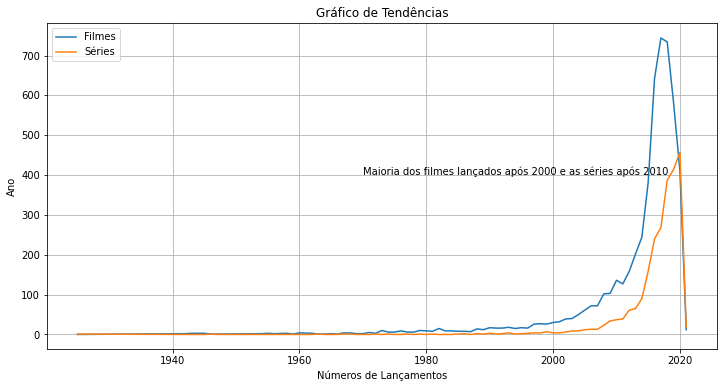

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

# gerando os dados para plotagem
ax.plot(df_grouped_pivot.release_year, df_grouped_pivot.Movie, label='Filmes')
ax.plot(df_grouped_pivot.release_year, df_grouped_pivot['TV Show'], label='Séries')

# definindo o nome dos eixos e Título
ax.set_xlabel('Números de Lançamentos')
ax.set_ylabel('Ano')
ax.set_title('Gráfico de Tendências')

# adicionando informações extras
plt.text(x=1970, y=400, s=r'Maioria dos filmes lançados após 2000 e as séries após 2010', fontsize=10)

# adicionando grid e legenda
plt.grid()
ax.legend()
plt.savefig(fname="vis-3-tendencia.jpg")

### Gráfico de Barras ou Histogramas

Outro tipo de gráfico que mostra relações entre diferentes conjuntos de dados é o gráfico de barras. Em um gráfico de barras, a altura da barra representa o valor medido: quanto maior ou maior a barra, maior o valor.

Um histograma consiste em um gráfico de barras que demonstra uma distribuição de frequências, onde a base de cada uma das barras representa uma classe, e a altura a quantidade ou frequência absoluta com que o valor da classe ocorre. Ao mesmo tempo, pode ser utilizado como um indicador de dispersão de processos. Tem como objetivo ilustrar como uma determinada amostra de dados ou população está distribuída, dispondo as informações de modo a facilitar a visualização da distribuição dos dados. Ao mesmo tempo, ressalta a localização do valor central e da distribuição dos dados em torno deste valor central. 

Possui dois eixos com funções diferentes, onde o eixo horizontal é dividido em pequenos intervalos, demonstrando valores assumidos pela variável de interesse. Já o eixo vertical é proporcional à frequência de observações da amostra onde os valores pertencem aquela classe ou intervalo.



In [ ]:
# extraindo apenas o ano adicionado da coluna "date_added"
df['year_added'] = df['date_added'].str.slice(start=-4)

# agrupando do ano adicionado e tipo, fazendo a contagem na coluna show_id
df_added = df.groupby(['year_added', 'type'], as_index=False).show_id.count()

df_added.columns = ['year_added', 'type', 'count']
df_added = df_added.pivot(index='year_added', columns='type', values='count').reset_index()
df_added.fillna(0, inplace=True)
df_added.tail()

type,year_added,Movie,TV Show
9,2017,864.0,361.0
10,2018,1255.0,430.0
11,2019,1497.0,656.0
12,2020,1312.0,697.0
13,2021,88.0,29.0


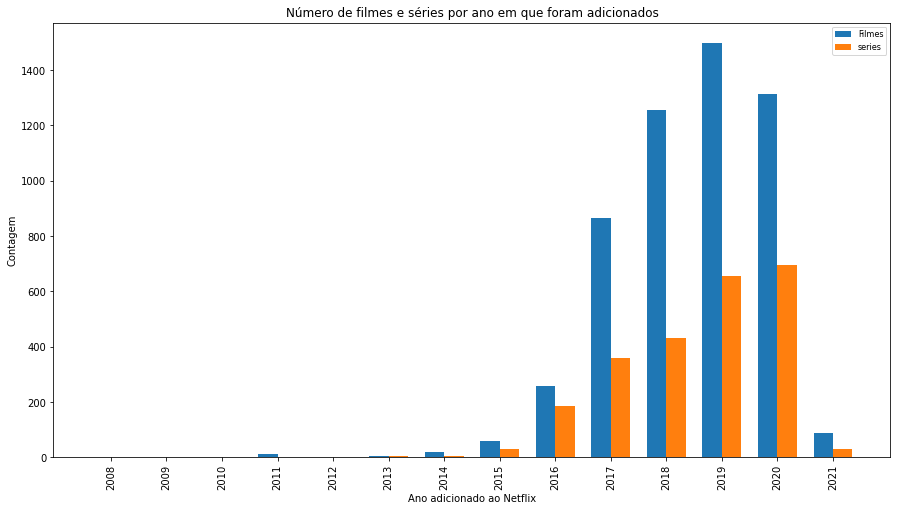

In [ ]:
# parametros iniciais
rotulos = df_added['year_added']
x = np.arange(len(rotulos))
width = 0.35 # distanciamento das barras

fig, ax = plt.subplots(figsize=(15,8))

# gerando dados para gráfico de barras
movie_bar = ax.bar(x - width/2, df_added['Movie'], width, label='Filmes')
serie_bar = ax.bar(x + width/2, df_added['TV Show'], width, label='series')

# definindo o nome dos eixos e Título
ax.set_xlabel('Ano adicionado ao Netflix')
ax.set_ylabel('Contagem')
ax.set_title('Número de filmes e séries por ano em que foram adicionados')
ax.set_xticks(x)
plt.xticks(rotation = 90) # Rotaciona os rótulos do eixo x em 90o.
ax.set_xticklabels(rotulos)

plt.rcParams.update({'font.size': 8})

# adicionandolegenda
ax.legend()
plt.savefig(fname="vis-4-barras.jpg")

No próximo passo irei adicionar uma função ao gráfico para plotar os rótulos em cima de cada barra.

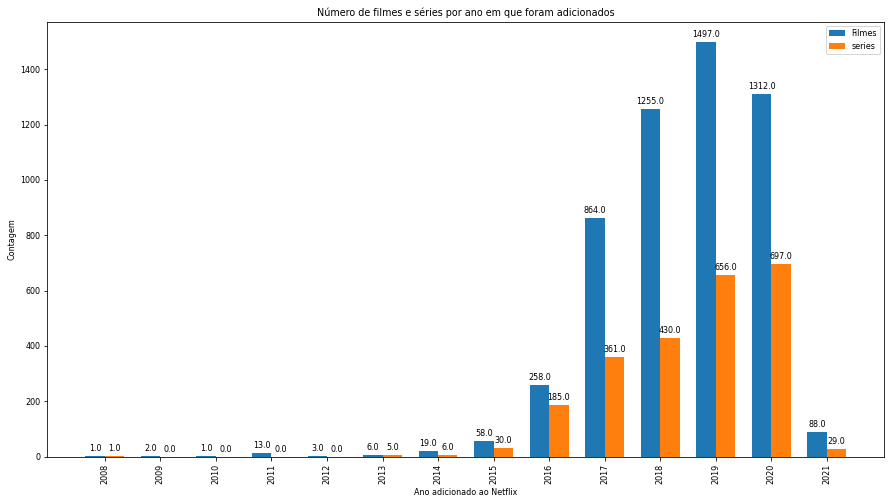

In [ ]:
# parametros iniciais
rotulos = df_added['year_added']
x = np.arange(len(rotulos))
width = 0.35 # distanciamento das barras

fig, ax = plt.subplots(figsize=(15,8))

# gerando dados para gráfico de barras
movie_bar = ax.bar(x - width/2, df_added['Movie'], width, label='Filmes')
serie_bar = ax.bar(x + width/2, df_added['TV Show'], width, label='series')

# definindo o nome dos eixos e Título
ax.set_xlabel('Ano adicionado ao Netflix')
ax.set_ylabel('Contagem')
ax.set_title('Número de filmes e séries por ano em que foram adicionados')
ax.set_xticks(x)
plt.xticks(rotation = 90) # Rotaciona os rótulos do eixo x em 90o.
ax.set_xticklabels(rotulos)

plt.rcParams.update({'font.size': 8})

# adicionandolegenda
ax.legend()

def get_label(qtds):
  """ Adiciona um rótulo de texto em cima de cada barra com o valor da altura de cada barra (quantidades)"""
  for i in qtds:
    altura = i.get_height()
    ax.annotate('{}'.format(altura,), xy=(i.get_x()+ i.get_width()/2, altura),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')
  
get_label(movie_bar)
get_label(serie_bar)
plt.savefig(fname="vis-5-barras_e_dados.jpg")

### Gráficos de Pizza e Donuts

Um gráfico de setores (também conhecido como gráfico de pizza) compara as partes com um todo. Como tal, mostra uma distribuição percentual. A pizza representa o conjunto de dados total e cada segmento da pizza é uma categoria específica dentro do todo.

Para usar um gráfico de pizza, os dados que você está medindo devem representar uma relação de proporção ou porcentagem. Cada segmento deve ser calculado usando a mesma unidade de medida, ou os números não terão sentido.

Os gráficos de pizza podem ser facilmente modificados para um gráfico de Donuts cobrindo a parte central do gráfico de pizza com um círculo e realinhando o texto/valores para se adequarem ao gráfico de Donuts. Abaixo está um exemplo simples onde implementei o gráfico de pizza e mais tarde a modifiquei para um gráfico de donuts.

Como esses gráficos representam porcentagens, iremos incluir uma coluna de totais de inclusão (Filmes + Séries).

In [ ]:
# precisamos gerar uma coluna de totais
df_added['Total'] = df_added['Movie'] + df_added['TV Show']

# para se tornar mais representativo vamos utilizar apenas os anos de 2017 a 2020
df_slice = df_added[-5:-1]
df_slice = df_slice.reset_index(drop=True)
df_slice

type,year_added,Movie,TV Show,Total
0,2017,864.0,361.0,1225.0
1,2018,1255.0,430.0,1685.0
2,2019,1497.0,656.0,2153.0
3,2020,1312.0,697.0,2009.0


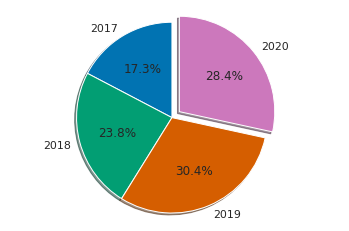

In [ ]:
# Gráfico de Pizza
rotulos = df_slice['year_added']
tam = df_slice['Total']
explode = (0, 0, 0, 0.1) # cada numero representa a sequencia de dados
# explode = (0, 0.1, 0, 0) # para explodir 2018

fig2, ax2 = plt.subplots()
ax2.pie(tam, explode=explode, labels=rotulos, autopct= '%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal') # garante o formato circular do gráfico
plt.savefig(fname="vis-6-pizza.jpg")
plt.show()

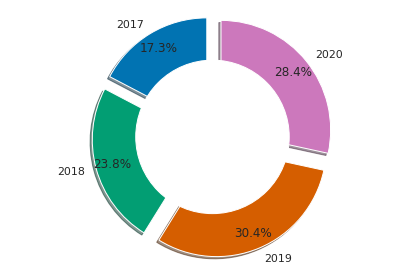

In [ ]:
# Gráfico de Donuts

# Gráfico de Pizza
rotulos = df_slice['year_added']
tam = df_slice['Total']
explode = (0.1, 0.1, 0.1, 0.1) # para explodir todos os pedaços


fig2, ax2 = plt.subplots()
ax2.pie(tam, explode=explode, labels=rotulos, autopct= '%1.1f%%', shadow=True, startangle=90, pctdistance=0.85)

# desenhando o círculo central em branco
circulo = plt.Circle((0,0), 0.70, fc='white') # cria a figura círculo em branco, eixo (0,0) e raio-0.70
fig2= plt.gcf() # Acrescenta a figura atual
fig2.gca().add_artist(circulo) # Obtém o eixo atual (0,0) e adiciona a figura circulo


ax2.axis('equal') # garante o formato circular do gráfico
plt.tight_layout()
plt.savefig(fname="vis-7-donut.jpg")
plt.show()

Caso queira conhecer mais sobre o atributo círculos, consulte a documentação oficial do Matplot Lib no [link](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Circle.html).

A Matplotlib é uma biblioteca de visualização muito importante para o Python, pois outras bibliotecas de visualização em python dependem da matplotlib. Algumas das vantagens/benefícios do aprendizado do matplotlib são:


*   Fácil Aprendizado;
*   Eficiente;
*   Possibilita customizações, possibilitando a representação de qualquer gráfico;


Procurei passar pelos principais pontos e recursos do MatplotLib, mas confira no [site oficial](https://matplotlib.org/3.1.0/gallery/index.html) as outras possibilidades.





## O Seaborn

Seaborn é uma biblioteca de visualização do Python baseada no `matplotlib`, que vimos anteriormente. Fornecendo uma interface de alto nível, permite a construção de gráficos estatísticos mais atraentes e informativos.

<p align=center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/seaborn.png"></p>

Para você ter uma noção dos tipos de gráficos que podem ser construídos com a biblioteca `seaborn`, dê uma olhada na [galeria de exemplos](https://seaborn.pydata.org/examples/index.html#example-gallery) ou acompanhe os [tutoriais](https://seaborn.pydata.org/tutorial.html#tutorial) fornecidos na própria documentação do pacote.

Se você está se perguntando o motivo pelo qual você usaria o `seaborn` e não `matplotlib`, eu posso te dar algumas vantagens:

* Matplotlib não é otimizado para o Pandas, uma vez que é mais antigo (veio antes) que ele.
* Matplotlib é baixo nível se comparado ao Seaborn. Ser mais baixo nível significa que você precisa de mais código e mais trabalho para conseguir customizar seus gráficos.
* Deixar um gráfico *sexy* e atraente no Matplotlib pode ser uma tarefa árdua!
* Há vários tipos de gráficos não contemplados no Matplotlib, mas que estão presentes no Seaborn.

## Aplicando o estilo do Seaborn no Matplotlib

O Seaborn fornece uma interface mais *high-level* para criarmos gráficos elaborados, visualmente melhores e mais complexos. É muito comum vermos *notebooks* de *Data Science* usando `seaborn` como biblioteca primária para plotar gráficos.

Entretanto, mesmo quem prefere usar o `matplotlib` consegue tirar proveito do estilo que está por trás do `seaborn`.

Veja o primeiro exemplo desse notebook, o bloco a seguir é uma outra forma de gerar o mesmo gráfico.

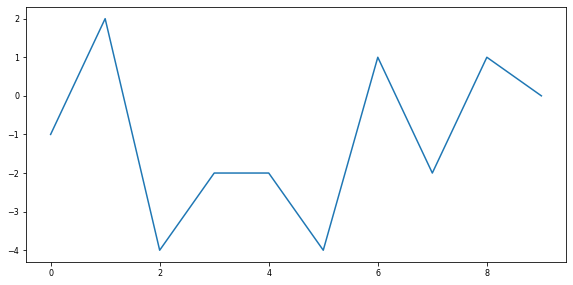

In [ ]:
# gerar dados aleatórios
# número de amostras
n = 10 

#gerando dados
x = np.arange(n)
y = np.random.randint(-5, 5 + 1, n, dtype=int)

# plotar o gráfico com MATPLOTLIB
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, y)

plt.tight_layout()


Mas veja só o que é possível melhorar apenas importando a biblioteca `seaborn` e chamando o método `sns.set()`.

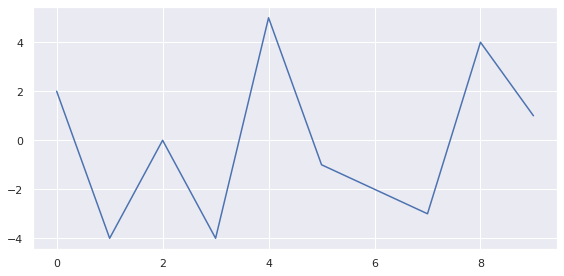

In [ ]:
# importar seaborn
import seaborn as sns
%matplotlib inline

#chamando o método sns.set()
sns.set()

# plotar o gráfico com MATPLOTLIB usando estilo do Seaborn
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, y)

plt.tight_layout()
plt.savefig(fname="vis-8-sns_oneline.jpg")

Repare que usamos exatamente a mesma função para plotar o gráfico com o `matplotilib`. No entanto, ele já ganhou um visual bem mais moderno e agradável aos olhos.

## Alguns exemplos do Seaborn

Quando você estiver confortável com o `matplotlib` e quiser dar um passo a mais, comece a ver a sua documentação e faça alguns exemplos dos [tutoriais oficiais](https://seaborn.pydata.org/tutorial.html#tutorial). Lembre-se que esse é um *plus*, mas antes disso você precisa **fortalecer os conceitos e as bases**. Não adianta nada você saber "copiar" gráficos bonitos se não tiver noção do que eles representam. 

Vou apresentar aqui alguns gráficos mais complexos e avançados, só para você ter ideia do mundo de visualização de dados que existe por aí.

**Observação**
O comando `plt.show()` limpa todo o quadro quando o gráfico é exposto, então se o comando para salvar a figura `plt.figsave()`estiver após vai salvar uma imagem em branco.

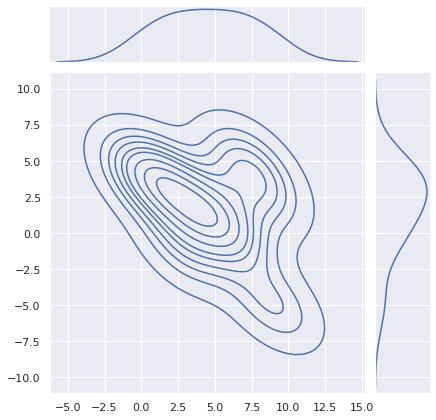

In [ ]:
# gerar dados aleatórios
# número de amostras
n = 10 

#gerando dados
x = np.arange(n)
y = np.random.randint(-5, 5 + 1, n, dtype=int)

# JOINT PLOT
sns.jointplot(x=x, y=y, kind='kde')
plt.savefig('vis-9-sns_join.jpg', dpi=200)
plt.show();

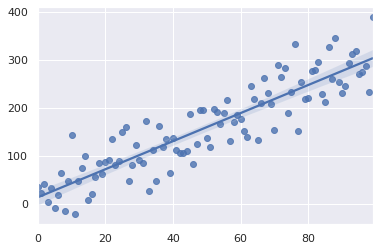

In [ ]:
# DATA + REGRESSÃO LINEAR

# gerar dados aleatórios
a = np.arange(100)
b = 3 * a + 14 + np.random.normal(0, 40, len(a))

sns.regplot(x=a, y=b)
plt.savefig(fname="vis-10-sns_regressao.jpg")
plt.show()

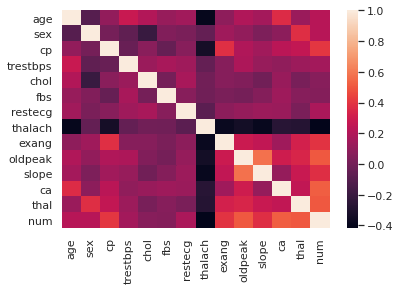

In [ ]:
# HEATMAP

# importar dataset da UCI
dataset_uci = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/heart-disease-uci.csv"
df_heart = pd.read_csv(dataset_uci)

# heatmap (mapa de calor)
sns.heatmap(df_heart.corr())
plt.savefig(fname="vis-11-sns_heat.jpg")
plt.show()

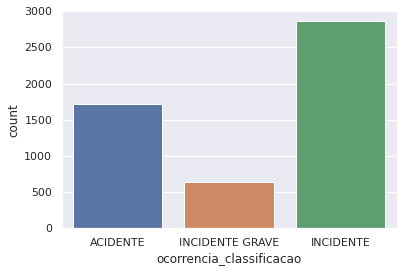

In [ ]:
# COUNTPLOT

# importar dados do CENIPA
df_cenipa = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/ocorrencias_aviacao.csv")

sns.countplot(x=df_cenipa["ocorrencia_classificacao"])
plt.savefig(fname="vis-12-sns_barras.jpg")
plt.show()

Nesta etapa do notebook, foram gerados gráficos com dados aleatórios e / ou de dataset tratados anteriormente pelo Carlos Melo utilizando no curso [Data Science na Prática](https://sigmoidal.ai/curso-online-data-science-na-pratica/).


---
<center><img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*</center>

---

Não deixe de conferir o curso. Eu já fiz e recomendo a todos que desejam iniciar sua carreira como cientista de dados. Mas você pode me perguntar por que deveria fazer um curso se está tudo disponível na internet. 

A didática que o Carlos utiliza no curso é única. Sempre com exemplos reais e desafiantes. Rapidamente percebemos nossa evolução quando estamos sendo guiados por alguém que já enfrentou muitas dificuldades e por diversas vezes tentou aprender sozinho.

Nas próximas etapas desse notebook irei utilizar outro dataset disponível no Kraggle, sobre doenças cardíacas. Como já habilitamos a API do Kraggle não será necessário realizar a autenticação novamente



In [ ]:
# Aceitar a competição e copiar o endereço da API para o download do dataset
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

# Descompactar o arquivo baixado
!unzip \*.zip  && rm *.zip

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 1.53MB/s]
Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  


In [ ]:
df1 = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
df1.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# preparando os dados para visualização
df1_grouped = df1.groupby(['age', 'DEATH_EVENT'], as_index=False).ejection_fraction.count()
df1_grouped.columns = ['Age', 'Death_Event', 'Count']
df1_grouped.head()

,Age,Death_Event,Count
0,40.0,0,7
1,41.0,0,1
2,42.0,0,6
3,42.0,1,1
4,43.0,0,1


### Gráfico de Tendências

Já fizemos anteriormente um gráfico de tendências utilizando o Matplot. Vamos agora plotá-lo utilizando a biblioteca Seaborn.

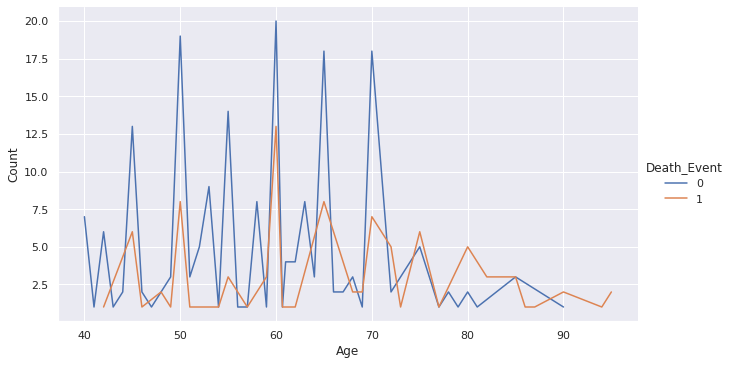

In [ ]:
sns.relplot(x='Age', y='Count', hue='Death_Event', aspect=16/9, kind='line', data=df1_grouped);
plt.savefig(fname="vis-13-sns_tendencia.jpg")

### Gráfico de Dispersão (Scatter Plot)

Um gráfico de dispersão é uma representação gráfica da associação entre pares de dados. Esse emparelhamento de dados é o resultado da associação de diferentes medições de uma certa causa (por exemplo, pressão) com a medição correspondente da característica de qualidade (por exemplo, espessura da tinta). Os dados emparelhados podem também ser medições de duas causas (por exemplo, pressão e temperatura), ou duas características de qualidade (espessura e brilho). Cada par se torna um ponto do gráfico de dispersão.

Frequentemente é desejável determinar se existe uma relação ou associação entre duas variáveis. Por exemplo, uma vez que um diagrama de causa e efeito tenha sido desenvolvido para identificar causas potenciais que tenham impacto em uma característica de qualidade de um processo, a relação entre as causas e as características de qualidade têm que ser estudadas. Os resultados desse esforço devem ajudar a determinar qual ação poderia ser tomada no processo. Uma ferramenta para estudar tais relações é o gráfico de dispersão, o qual também pode ser usado para estudar a associação (ou correlação) entre diferentes características de qualidade.

Para traçá-lo, geralmente colhemos dados de maneira a vincular duas variáveis a uma observação. Por exemplo, podemos querer avaliar se a satisfação percebida por um cliente de um projeto está correlacionada ao atraso de seu projeto. Para isso, portanto, coletamos dados de N projetos, e para cada um deles, coletamos os dias de atraso e a satisfação do cliente.

De maneira genérica, a satisfação é a nossa variável resposta, ou variável Y. Os dias de atraso é a nossa variável de entrada, ou variável X. O número do projeto é a nossa observação, ou indexador. Ele tem esse nome pois ele atrela os valores da variável X com os da variável Y.

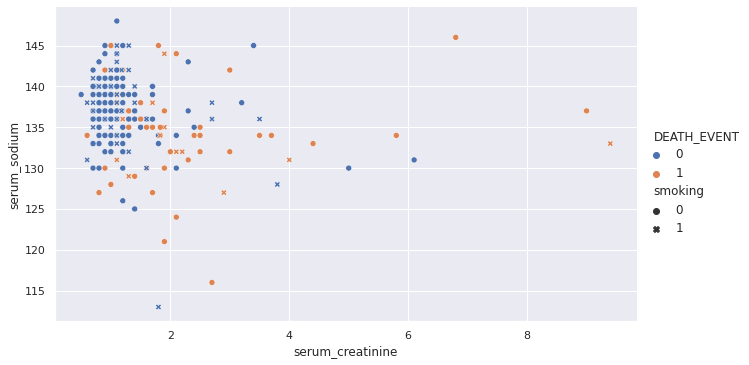

In [ ]:
sns.relplot(x='serum_creatinine', y='serum_sodium', hue='DEATH_EVENT', kind='scatter', style="smoking", data=df1, aspect=16/9);
plt.savefig(fname="vis-14-sns_dispersao.jpg")

Como visto, a biblioteca Seaborn permite criar gráficos mais agradáveis visualmente apenas com uma linha de código.

### Mapas de Calor ou Heatmap

Os heatmaps são amplamente utilizados em dados de séries temporais para trazer à tona as sazonalidades e outros padrões no conjunto de dados. Entretanto, para construir um mapa de calor, precisamos transformar os dados em um formato específico para apoiar a plotagem. 

Abaixo está uma amostra de código para transformar os dados de forma a se adequarem ao gráfico do heatmap e à biblioteca Seaborn usada para construir o heatmap.

In [ ]:
df1_heat = df1.groupby(['age', 'ejection_fraction'], as_index=False).DEATH_EVENT.sum()
df1_heat.columns = ['Age', 'Fraction', 'Deaths']
df1_heat = df1_heat.pivot(index='Age', columns='Fraction', values='Deaths')
df1_heat.fillna(0, inplace=True)
df1_heat.head()

Fraction,14,15,17,20,25,30,35,38,40,45,50,55,60,62,65,70,80
Age,,,,,,,,,,,,,,,,,
40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


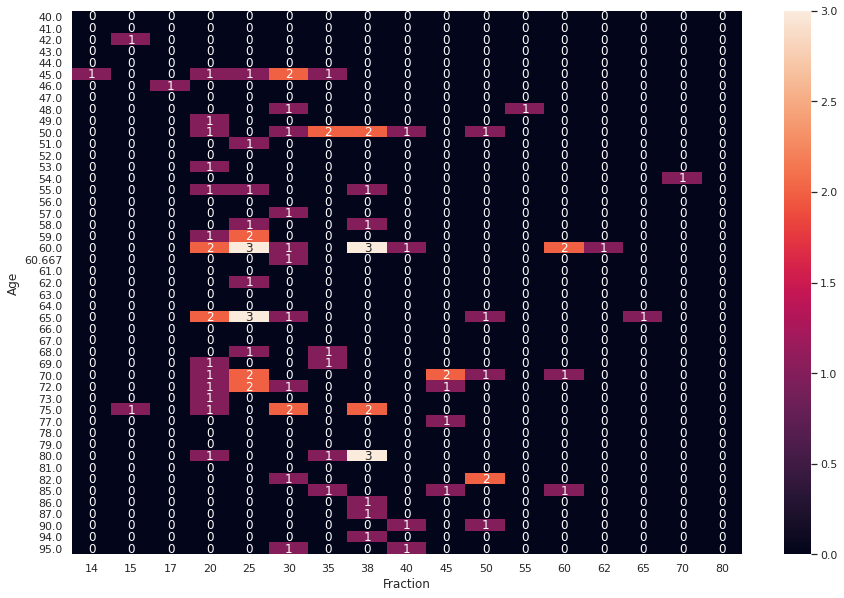

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.subplots(figsize=(15,10))
sns.heatmap(df1_heat, annot=True)
plt.show()
plt.savefig(fname="vis-15-sns_heat.jpg")

### Pair Plot ou plotagem em Pares

Uma das melhores ferramentas do Seaborn, pois é possível comparar todos os atributos numéricos do dataset em apenas um gráfico.


In [ ]:
subset = df1.iloc[:,[0,1,2,3,4, 10]]
subset.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,smoking
0,75.0,0,582,0,20,0
1,55.0,0,7861,0,38,0
2,65.0,0,146,0,20,1
3,50.0,1,111,0,20,0
4,65.0,1,160,1,20,0


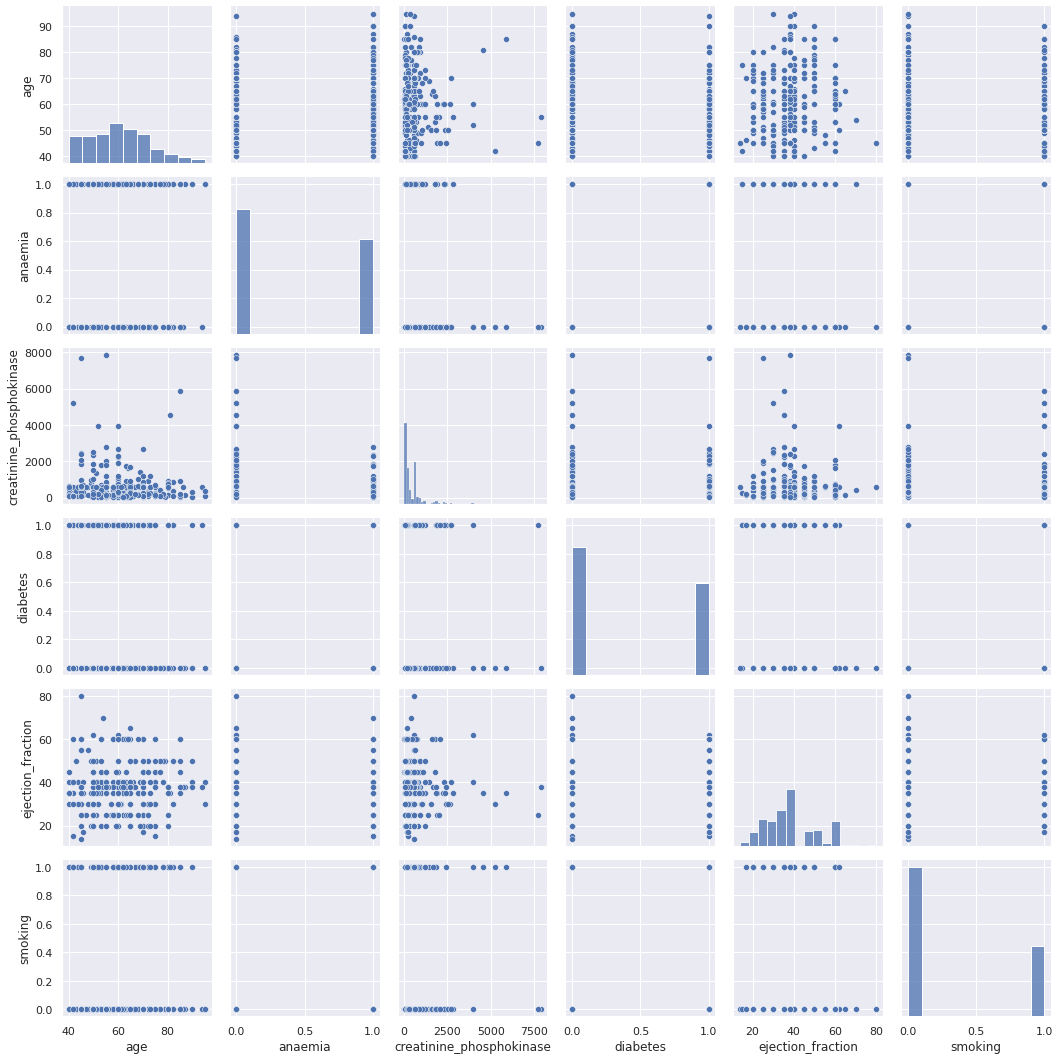

In [ ]:
sns.pairplot(subset);
plt.savefig(fname="vis-16-sns_pairplot.jpg")

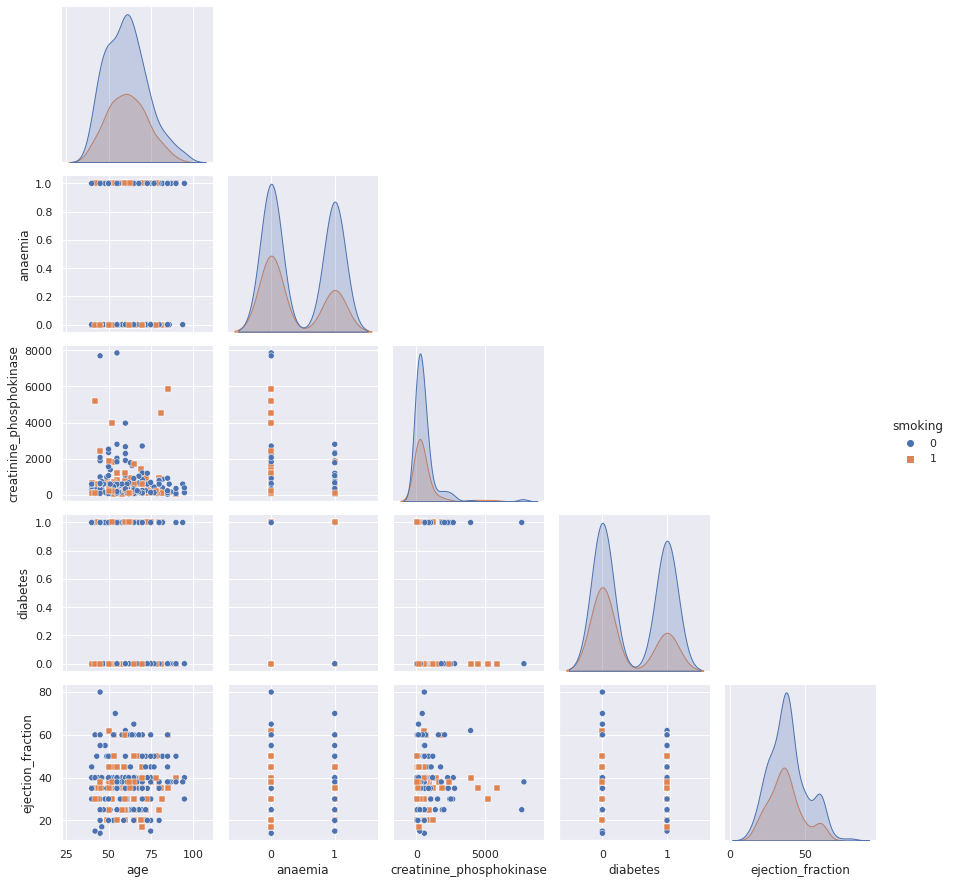

In [ ]:
sns.pairplot(subset, hue='smoking', markers=["o", "s"], corner=True);
plt.savefig(fname="vis-17-sns_pairplot2.jpg")

### Pair Grid

Uma das vantagens da biblioteca Seaborn são as customizações.

Este típico de grade utilizando subplot traça relações em pares em um conjunto de dados.

Este gráfico mapeia cada variável de um conjunto de dados em uma coluna e linha em uma grade de múltiplos eixos. 


Para esse exemplo vamos voltar no DataFrame do Netflix e expor no gráfico os anos de lançamento Totais, vídeos e séries.

In [ ]:
# agrupando os lançamentos por ano
df_pair = df.groupby(['release_year', 'type'], as_index=False).show_id.count()

# renomeado as colunas
df_pair.columns = ['release_year', 'type', 'count']

# pivotando o gráfico e preenchendo as colunas com as contagens
df_pair = df_pair.pivot(index='release_year', columns= 'type', values='count').reset_index()

# criando a coluna de totais
df_pair['Total'] = df_pair['Movie'] + df_pair['TV Show']

# reorganizando a sequencia das coluas
df_pair = df_pair[['release_year', 'Total', 'Movie', 'TV Show']].reset_index()

# substituindo os valores ausentes por 0
df_pair.fillna(0, inplace=True)

# filtrando os lançamentos totais maiores que 20
df_pair = df_pair[df_pair.Total > 20]

# reordenando pelo ano de lançamento
df_pair = df_pair.sort_values('release_year',ascending=False)

# visualizando o final do Dataframe
df_pair.tail()

type,index,release_year,Total,Movie,TV Show
51,51,2000,34.0,30.0,4.0
50,50,1999,33.0,26.0,7.0
49,49,1998,31.0,27.0,4.0
48,48,1997,30.0,26.0,4.0
44,44,1993,22.0,18.0,4.0


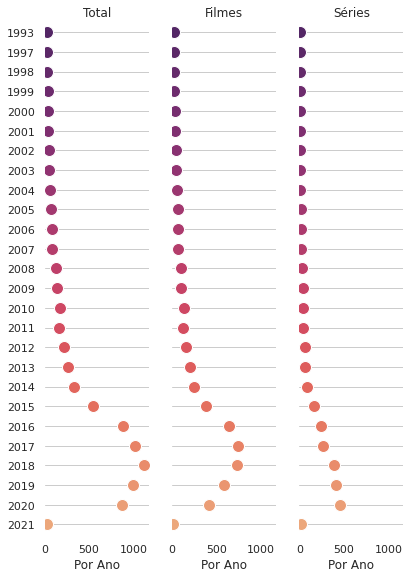

In [ ]:
# definindo o limite do eixo x (maior valor na coluna de totais)
limite_x = df_pair['Total'].max()

#definindo o estilo ["white", "dark", "whitegrid", "darkgrid", "ticks"]
sns.set_style("whitegrid")

# istanciando os gráficos a partir do ano, plotando as colunas Total, Filmes e Séries
grid = sns.PairGrid(df_pair.sort_values("release_year", ascending=True),
                    x_vars=df_pair.columns[2:], y_vars=["release_year"],
                    height=8, aspect=.25)

# desenhando os pontos por linha
grid.map(sns.stripplot, size=12, orient="h", jitter=False, palette="flare_r", linewidth=1, edgecolor="w")

# Usando o mesmo eixo x para limitar todas as colunas
grid.set(xlim=(0, limite_x+50), xlabel="Por Ano", ylabel="")


# Alterando os nomes das colunas
titles = ["Total", "Filmes", "Séries"]

# gerando os nomes para as colunas e rotacionando os eixos por ano
for ax, title in zip(grid.axes.flat, titles):

    # definindo um título diferente para cada coluna
    ax.set(title=title)

    # rotacionando os eixos de cada coluna para compatibilizar com os anos
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

# a função despine mostra os eixos, nesse caso ficam apenas os eixos inferiores e esquerdos
sns.despine(left=True, bottom=True)
plt.savefig(fname="vis-18-sns_pairgrid.jpg", dpi=250)

## Gráficos Interativos

As ferramentas de dashboard são amplamente utilizadas para compartilhar visualizações, mas digamos que existe um padrão interessante que você notou ao realizar a análise de dados e gostaria de compartilhar com outras áreas da empresa ou profissionais. 

Se eles forem compartilhados como uma imagem, então pode não haver muito que o se possa fazer, mas se eles forem compartilhados como um gráfico interativo, isso dará ao usuário o poder de olhar para os detalhes granulares fazendo zoom in ou out ou usar outra funcionalidade para interagir com o gráfico. 

Abaixo está um exemplo onde estamos criando um arquivo HTML como saída, que inclui a visualização que pode ser compartilhada com qualquer outro usuário e que pode ser simplesmente aberta em um navegador da web.

In [ ]:
df1_heat.head()

Fraction,14,15,17,20,25,30,35,38,40,45,50,55,60,62,65,70,80
Age,,,,,,,,,,,,,,,,,
40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from bokeh.plotting import figure, output_file, show, output_notebook
output_notebook()

# create a new plot with a title and axis labels
p = figure(title="Idade x Ejeção", x_axis_label='Idade', y_axis_label='Ejeção')

p.circle(df1["age"], df1["ejection_fraction"], fill_alpha=0.2, size=10)

output_file("18-Grafico_Iterativo.html", title="Example")

show(p)

Agora que o arquivo 18-GraficoIterativo.html foi gerado basta realizar o download e compartilhar o arquivo com outras áeras ou profissionais.

# Conclusão

Passamos por diversas maneiras de gerar um gráfico e permitir a visualização dos dados. Conforme comentado inicialmente precisamos utilizar a visualização dos dados porque fornece um resumo visual das informações, facilita a identificação de padrões e tendências, sendo mais fácil do que olhar através de milhares de linhas em uma planilha. 

**É a maneira como o cérebro humano funciona.**

Como o objetivo da análise de dados é obter insights, os dados são muito mais valiosos quando são visualizados. Mesmo que um analista de dados possa extrair insights dos dados sem visualização, será mais difícil **comunicar** o significado sem a visualização. Gráficos facilitam a comunicação dos resultados dos dados, mesmo que seja possível identificar os padrões sem eles.

Os gráficos revelam características de dados que as estatísticas e modelos podem falhar: distribuições incomuns de dados, padrões locais, agrupamentos, lacunas, valores ausentes, evidência de arredondamento ou amontoamento, limites implícitos, aberturas, etc. Os gráficos levantam questões que estimulam a pesquisa e sugerem idéias. Parece fácil. De fato, realizar a interpretação dos gráficos demanda experiência para identificar características potencialmente interessantes e de senso estatístico para se proteger contra os perigos de interpretação excessiva. Assim como os gráficos são úteis para verificar os resultados dos modelos, os modelos são úteis para verificar as idéias derivadas dos gráficos (para mais informações sobre modelos, veja Hand, 2019).

